# [Title]
W207

Group Members: Ivan Escalona, Daisy Khamphakdy, Iris Lew, Shuo Wang, Amanda Teschko

Objective (problem statement):

Dataset: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify

Model: 

---


**Features Definitions:**
*   Danceability - how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
*   Energy - a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
*   Key - estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
*   Loudness - overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
*   Mode - the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
*   Speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
*   Acousticness - a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
*   Instrumentalness - detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. (THIS MIGHT BE A PREDICTION AND ALGORITHM FROM SPOTIFY**)
*   Liveness - detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
*   Time_signature - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
*   Duration_ms - The duration of the track in milliseconds.
*   Valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
*   Tempo - the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**References:**
1.   https://www.kaggle.com/code/pelinsoylu/spotify-popularity-prediction-ml-practice

---







In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [ ]:
# from google.colab import drive

# drive.mount('/content/gdrive')

raw_df = pd.read_csv('spotify_songs.csv')


##Exploratory Data Analysis

In [ ]:
# Check first few rows of the dataset. 
raw_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
# Check the number of rows and columns.
raw_df.shape

(32833, 23)

In [ ]:
raw_df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
# Check genre column as our analysis will focus on genres.
raw_df["playlist_genre"].value_counts()

edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: playlist_genre, dtype: int64

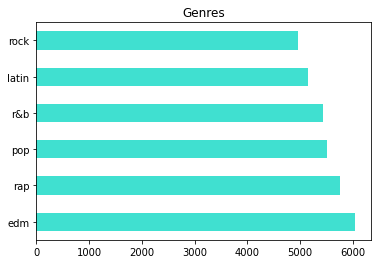

In [ ]:
#Plot the above date from genre column in bar plot for better vizualization
raw_df["playlist_genre"].value_counts().plot(kind="barh",color=["turquoise"],title="Genres");

####Check Missing Data:

In [ ]:
#Check missing data
print("----------- Columns with missing data ------------")
for col in raw_df.columns:
    pct_missing = raw_df[col].isnull().sum()/len(raw_df[col])*100
    if pct_missing > 0:
        print("Column:", col, "       % of records missing:", "{0:.2f}%".format(pct_missing))

print("\n----------- Count of columns with N/A ------------")
raw_df.isna().sum()

----------- Columns with missing data ------------
Column: track_name        % of records missing: 0.02%
Column: track_artist        % of records missing: 0.02%
Column: track_album_name        % of records missing: 0.02%
Column: playlist_id        % of records missing: 0.00%
Column: playlist_genre        % of records missing: 0.00%
Column: playlist_subgenre        % of records missing: 0.00%
Column: danceability        % of records missing: 0.00%
Column: energy        % of records missing: 0.00%
Column: key        % of records missing: 0.00%
Column: loudness        % of records missing: 0.00%
Column: mode        % of records missing: 0.00%
Column: speechiness        % of records missing: 0.00%
Column: acousticness        % of records missing: 0.00%
Column: instrumentalness        % of records missing: 0.00%
Column: liveness        % of records missing: 0.00%
Column: valence        % of records missing: 0.00%
Column: tempo        % of records missing: 0.00%
Column: duration_ms        % 

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 1
playlist_genre              1
playlist_subgenre           1
danceability                1
energy                      1
key                         1
loudness                    1
mode                        1
speechiness                 1
acousticness                1
instrumentalness            1
liveness                    1
valence                     1
tempo                       1
duration_ms                 1
dtype: int64

In [ ]:
#find tracks that are on multiple playlists with different genres
raw_df.groupby(['track_id']).filter(lambda x: x['playlist_genre'].nunique() > 1)[['track_id', 'track_name', 'track_artist', 'playlist_name','playlist_genre']].sort_values(['track_id'])


,track_id,track_name,track_artist,playlist_name,playlist_genre
28968,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,Locker Room,edm
23850,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,Today's Hits (Clean),r&b
9387,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,RAP Gangsta,rap
3124,00WIXhVVhswHuS6dlkScuw,Hot,Confetti,Electropop,pop
14626,00WIXhVVhswHuS6dlkScuw,Hot,Confetti,Modern Indie Rock // Alternative Rock / Garage...,rock
...,...,...,...,...,...
5242,7zBkFHiWejDPxIimU8XpVw,All over You,LEISURE,Music&Other Drugs,pop
26407,7zBkFHiWejDPxIimU8XpVw,All over You,LEISURE,Neo-Jazz Soul RnB & Afro,r&b
30939,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,EDM/POP,edm
20517,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,Latin/Hip Hop/Dancehall/Soca,latin


In [ ]:
#create mapping from track to a combined genre field (ie for those tracks on multiple playlists, concatenate the list of genres the song is associated with)
combined_genre_map = raw_df[raw_df['playlist_genre'].notnull()].groupby('track_id').agg({'playlist_genre':lambda x: ' '.join(x.unique())}).rename(columns={'playlist_genre':'combined_genre'})
combined_genre_map['combined_genre'].value_counts()

rap                       4996
edm                       4877
r&b                       4449
rock                      4264
pop                       4102
latin                     3981
pop edm                    274
pop r&b                    217
pop latin                  180
rap latin                  148
rap r&b                    147
pop rock                   107
latin edm                   93
rap edm                     61
r&b edm                     55
latin r&b                   45
pop latin edm               43
pop latin r&b edm           42
pop latin r&b               39
rock r&b                    35
pop rap                     33
pop r&b edm                 27
rap rock                    22
latin r&b edm               18
pop rap r&b                 12
pop rap edm                 11
pop rap latin               11
rap latin r&b               10
rap latin r&b edm            9
rap r&b edm                  7
pop rock r&b                 7
pop rap latin r&b            6
pop rap 

In [ ]:
#bring in new composite genre field
df = raw_df.join(combined_genre_map, on='track_id', how='left')
#drop fields at the playlist level and remove duplicates
df = df.drop(columns=['playlist_genre', 'playlist_name', 'playlist_id','playlist_subgenre']).drop_duplicates()
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,combined_genre
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,pop edm
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,pop edm
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,pop edm
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,pop
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,edm
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,edm
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,edm
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,edm


####Drop NA data:

There aren't many missing values, so we have decided to keep all columns for the time being.

In [ ]:
print("---------Unique values per Column----------")
df.nunique().sort_values(ascending=False)

---------Unique values per Column----------


track_id                    28356
track_name                  23449
track_album_id              22545
duration_ms                 19785
track_album_name            19743
tempo                       17684
track_artist                10692
loudness                    10222
instrumentalness             4729
track_album_release_date     4530
acousticness                 3731
liveness                     1624
valence                      1362
speechiness                  1270
energy                        952
danceability                  822
track_popularity              101
combined_genre                 44
key                            12
mode                            2
dtype: int64

In [ ]:
# Check the data types in our dataframe.
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
combined_genre               object
dtype: object

In [ ]:
print("--------Types of Columns--------")
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = list(df.select_dtypes(include=numerics).columns)

categorical_cols = list(df.select_dtypes(exclude=numerics).columns)

# Move some numeric to categorical
switch_cols = ['mode', 'key']
numeric_cols = [i for i in numeric_cols if i not in (switch_cols)]
categorical_cols.extend(switch_cols)


print(len(numeric_cols), "numeric columnss:", numeric_cols)
print()
print(len(categorical_cols),"categorical columns:", categorical_cols)

#Perhaps move time_signature into categorical and one hot encoding than numerical


--------Types of Columns--------
11 numeric columnss: ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

9 categorical columns: ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'combined_genre', 'mode', 'key']


In [ ]:
print("----------Numeric Column Summary Stats-------------")
df[numeric_cols].describe().transpose()

----------Numeric Column Summary Stats-------------


,count,mean,std,min,25%,50%,75%,max
track_popularity,28356.0,39.329771,23.702376,0.000000,21.000000,42.000000,58.00000,100.000
danceability,28356.0,0.653372,0.145785,0.000000,0.561000,0.670000,0.76000,0.983
energy,28356.0,0.698388,0.183503,0.000175,0.579000,0.722000,0.84300,1.000
loudness,28356.0,-6.817696,3.036243,-46.448000,-8.309250,-6.261000,-4.70900,1.275
speechiness,28356.0,0.107954,0.102556,0.000000,0.041000,0.062600,0.13300,0.918
acousticness,28356.0,0.177176,0.222803,0.000000,0.014375,0.079700,0.26000,0.994
instrumentalness,28356.0,0.091117,0.232548,0.000000,0.000000,0.000021,0.00657,0.994
liveness,28356.0,0.190958,0.155894,0.000000,0.092600,0.127000,0.24900,0.996
valence,28356.0,0.510387,0.234340,0.000000,0.329000,0.512000,0.69500,0.991
tempo,28356.0,120.956180,26.954560,0.000000,99.972000,121.993000,133.99900,239.440


####Histograms of Song Characteristics and Number of Occurances:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Bar graph of song characteristics and the occurance')

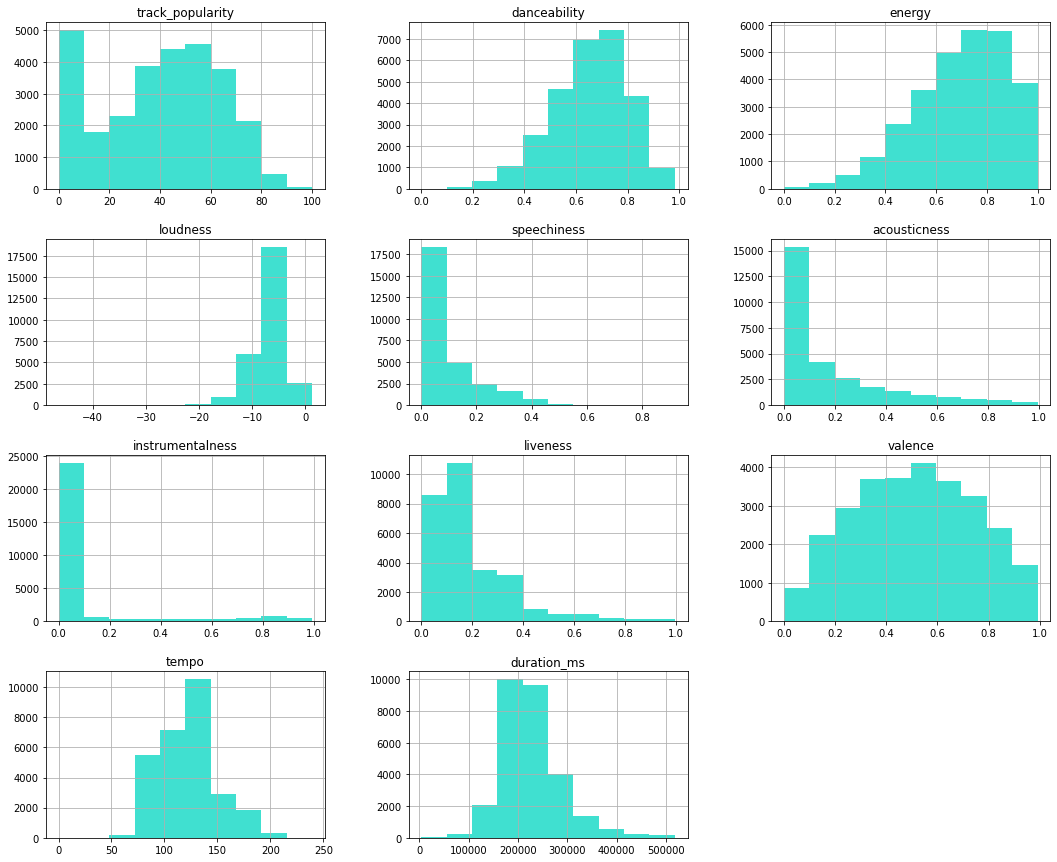

In [ ]:
fig = plt.figure(figsize = (18,15))
ax = fig.gca()
df[numeric_cols].hist(ax = ax, bins=10, color ='turquoise')
plt.title('Bar graph of song characteristics and the occurance')

Observations of the Histograms above:

CHARACTERISTICS |VALUE RANGE | OBSERVATIONS |
-|-|-|
Danceability|0-1|mean = 0.63|
Energy|0-1|as the value increases, occurance increases|
Key|0-11|...|
Loudness|-10 to -3|...|
Mode|0 or 1|...|
Speechiness|0-1|as the speech decreases, occurance increases|
Acousticness|0-1|as value increases, occurance decreases|
Instrumentalness|0-1|slight peak from 0.8 to 0.95|
Liveness|0-1|...|
Valence|0-1|as value increases, occurance decreases|
Tempo|70-220|...|
Duration_ms|0-800,000 milliseconds|...|
Time_signature|it has only 3 values (3,4,5)|max occurance is 4|

####Identify Correlations with Heatmap:

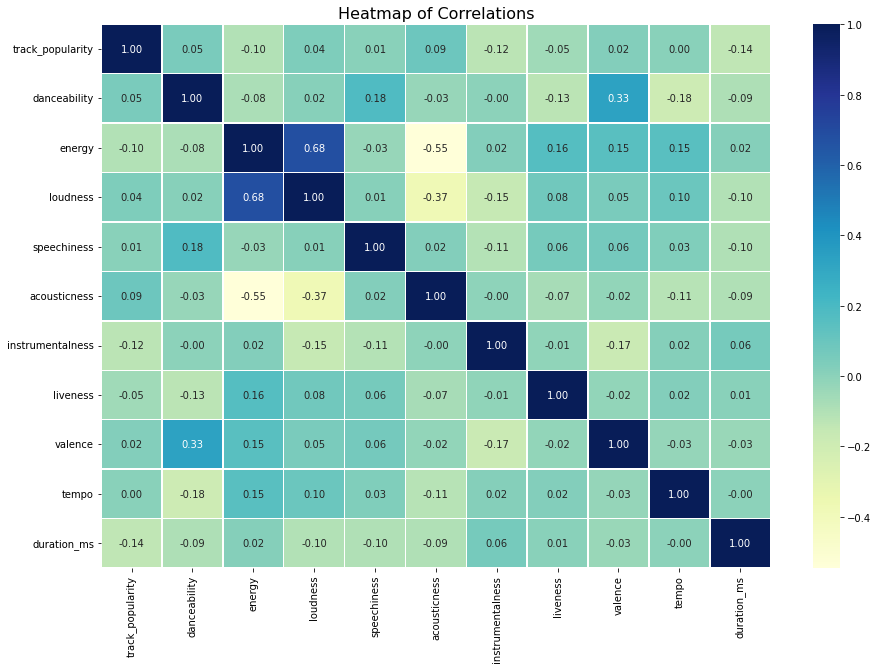

In [ ]:
correlation_mat =df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(15,10))   
plt.title('Heatmap of Correlations', fontsize=16)
sns.heatmap(correlation_mat, annot = True, ax=ax, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

Observations of the Heatmap Correlations:

*   Highest positive correlation = Energy and Loudness (0.66).  Colinearity here bc defintion is that energy is included in loudness. Instrumentalness & duration also might be colinearity
*   Lowest positive correlation = Loudness & Acousticness (-0.51)



  
####Bar Graphs of Genres and Song Characteristics:

<Figure size 1440x720 with 0 Axes>

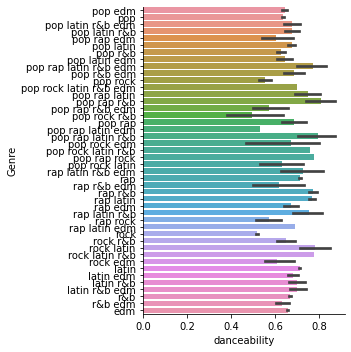

<Figure size 1440x720 with 0 Axes>

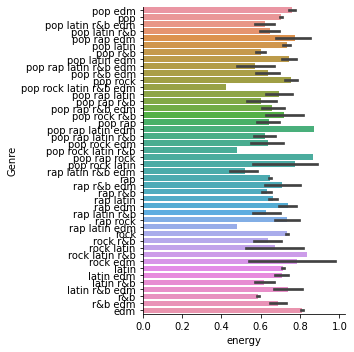

<Figure size 1440x720 with 0 Axes>

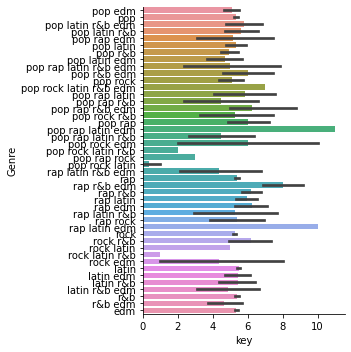

<Figure size 1440x720 with 0 Axes>

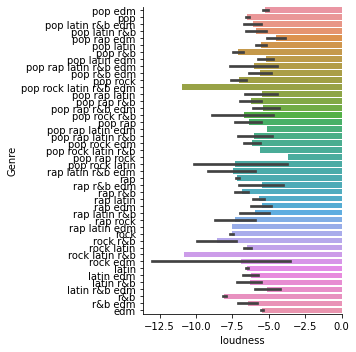

<Figure size 1440x720 with 0 Axes>

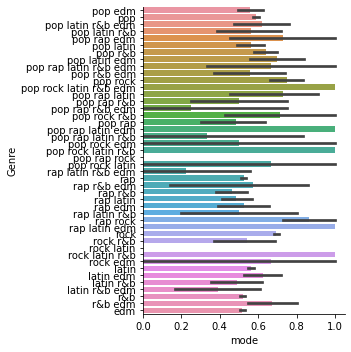

<Figure size 1440x720 with 0 Axes>

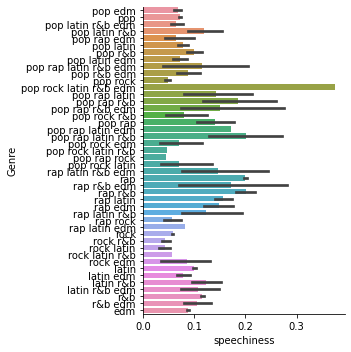

<Figure size 1440x720 with 0 Axes>

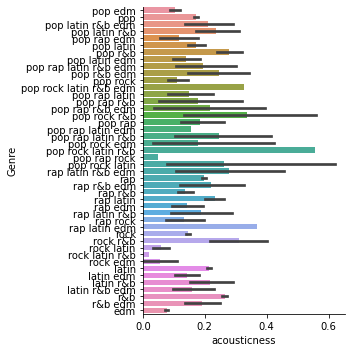

<Figure size 1440x720 with 0 Axes>

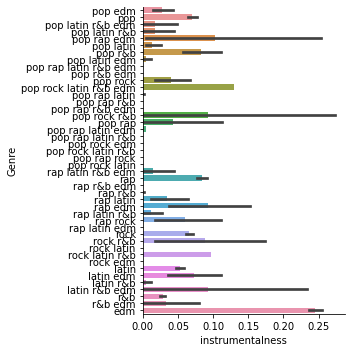

<Figure size 1440x720 with 0 Axes>

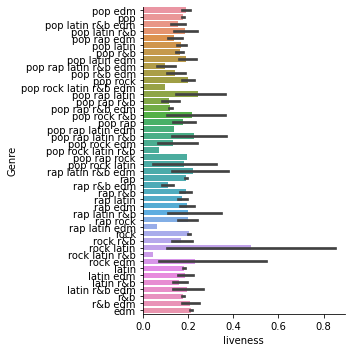

<Figure size 1440x720 with 0 Axes>

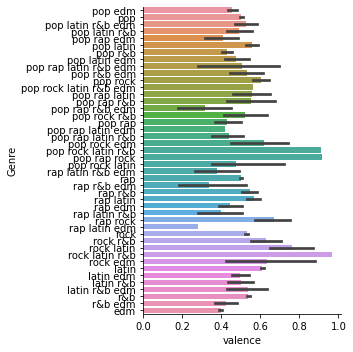

<Figure size 1440x720 with 0 Axes>

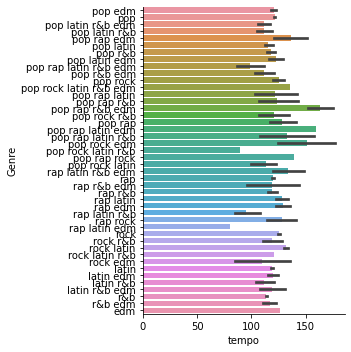

<Figure size 1440x720 with 0 Axes>

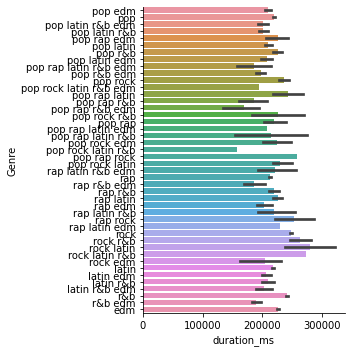

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness', 'instrumentalness', 'liveness','valence','tempo','duration_ms']
def plotting(feature):
    plt.figure(figsize=(20, 10))
    plot = sns.catplot(x=feature, y='combined_genre', data=df, kind='bar')
    plot.set_ylabels('Genre')
    plt.show()
    
for x in features:
    plotting(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


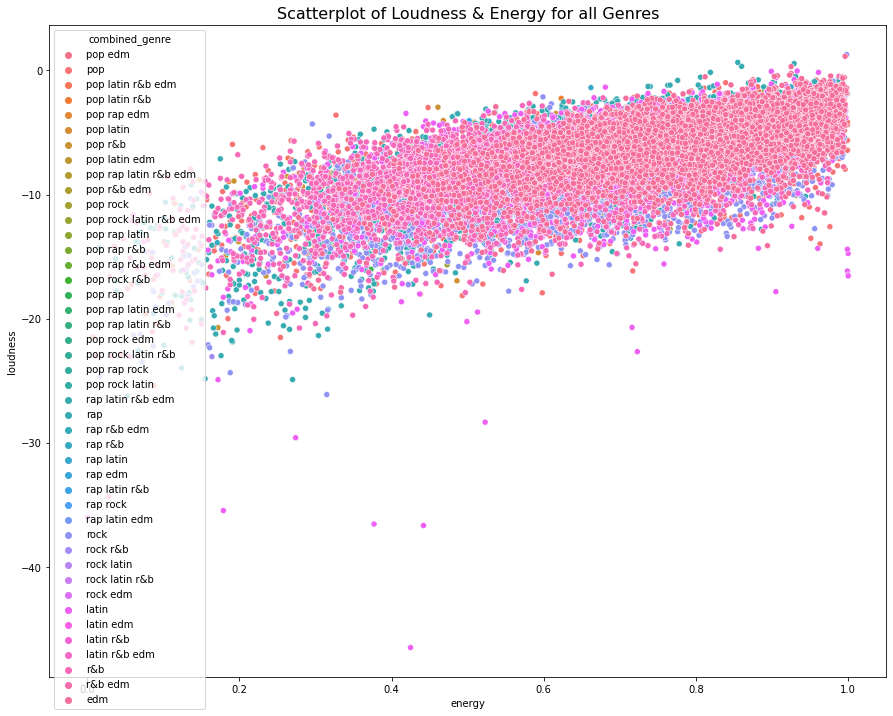

In [ ]:
plt.figure (figsize=(15, 12))
plt.title('Scatterplot of Loudness & Energy for all Genres', fontsize=16)
sns.scatterplot(df['energy'],df['loudness'],hue=df['combined_genre'],x_bins=30);

####Check Song Name:

In [ ]:
df["track_name"].value_counts().sort_index()

"I TRIED FOR YEARS... NOBODY LISTENED"    1
"This Is Seagull…."                       1
#1 Stunna                                 2
#NAKAMA                                   1
#Natural                                  1
                                         ..
숙녀 (淑女) Lady                              1
쉼표                                        1
중독 Overdose                               1
피카부 Peek-A-Boo                            1
하드캐리 Hard Carry                           1
Name: track_name, Length: 23449, dtype: int64

In [ ]:
df["track_name"].value_counts(ascending=False,dropna=False)

Breathe                       18
Paradise                      17
Poison                        16
Alive                         15
Forever                       14
                              ..
Vans - King Kavalier Remix     1
Arena                          1
Believe I'm Leaving            1
What You're Made Of            1
Typhoon - Original Mix         1
Name: track_name, Length: 23450, dtype: int64

In [ ]:
sn_df = df["track_name"].value_counts()
sn_df.head(50)

Breathe               18
Paradise              17
Poison                16
Alive                 15
Forever               14
Stay                  14
You                   13
Lost                  13
Heaven                12
Changes               12
Without You           12
Alone                 12
Hold On               11
Closer                11
Tell Me               11
Down                  10
Higher                10
Dreams                10
With You              10
Crazy                 10
Somebody               9
Control                9
Home                   9
Fire                   9
Magic                  9
California             9
Falling                8
Beautiful              8
Everyday               8
Work                   8
Sorry                  8
Runaway                8
Criminal               8
No Diggity             8
Easy                   8
Surrender              8
Let Me Love You        8
Money                  8
Time                   8
Trouble                7


####Outliers:

In [ ]:
# Outliers:


# Following 1.5Q1, Q3 rule for outliers
q1 = df[numeric_cols].describe().iloc[4,:]

q3 = df[numeric_cols].describe().iloc[6,:]

outliers_df = pd.DataFrame(index=df.index)

for column in numeric_cols:
    print(column)
    
    outliers_df[column] = df[column].loc[(df[column] < 1.5*q1[column]) | (df[column] > 1.5*q3[column])]

track_popularity
danceability
energy
loudness
speechiness
acousticness
instrumentalness
liveness
valence
tempo
duration_ms


In [ ]:
# This is a count of the outliers that we're dealing with

#In box plots you can see a lot of outliers, make sure to check. Outliers maybe expected as it's art.

# Out of 

outliers_count = {}

for column in outliers_df.columns:
    outliers_count[column] = round(outliers_df[column].notna().sum()*100/outliers_df.shape[0], 2)

outliers_count

{'track_popularity': 34.71,
 'danceability': 91.77,
 'energy': 80.17,
 'loudness': 66.67,
 'speechiness': 65.35,
 'acousticness': 45.82,
 'instrumentalness': 23.43,
 'liveness': 64.64,
 'valence': 47.25,
 'tempo': 86.26,
 'duration_ms': 87.42}

## Model
1) Build Model

2) Compile Model

3) Fit Model

In [ ]:
#Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

####Model Evaluation


####Model Prediction

###Precision & Recall (or Accuracy if we choose)

###Analysis/ Results